# Model Training

### Import Data and Required Packages

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Dependent Varialbe and Independent Variable

In [4]:
X = df.drop(columns=['math score'], axis=1)
y = df['math score']

In [5]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
X.shape, y.shape

((1000, 7), (1000,))

In [7]:
print("Categories in 'gender' column:  ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' column:  ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' column:  ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' column:  ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' column:  ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' column:   ['female' 'male']
Categories in 'race/ethnicity' column:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' column:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' column:   ['standard' 'free/reduced']
Categories in 'test preparation course' column:   ['none' 'completed']


#### Standard Scaling and One hot encoding

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_features = X.select_dtypes(include=object).columns
numerical_features = X.select_dtypes(exclude=object).columns


onehot_encoder = OneHotEncoder()
numeric_scaler = StandardScaler()

# We create a column transformer that will apply the one hot encoding on categorical features and standard scaling on numerical features
column_transformer = ColumnTransformer([
    ("OneHotEncoder", numeric_scaler, numerical_features),
    ("StandardScaler", onehot_encoder, categorical_features)],
) 




In [9]:
X = column_transformer.fit_transform(X)


In [10]:
X.shape

(1000, 19)

#### Separate dataset into train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate function to give all metrics after model training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    
    return mae, rmse, r2

In [14]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance For Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('-------------------------------------------------')


    print('Model preformance  for testing set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


print(len(r2_list))

Linear Regression
Model performance For Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
-------------------------------------------------
Model preformance  for testing set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance For Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
-------------------------------------------------
Model preformance  for testing set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance For Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
-------------------------------------------------
Model preformance  for testing set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806




KNeighbors Regressor
Model performance For Training set
- Root Mean Squared Error: 5.7128
- Mean Absolute Error: 4.5168
- R2 Score: 0.8552
-------------------------------------------------
Model preformance  for testing set
- Root Mean Squared Error: 7.2538
- Mean Absolute Error: 5.6190
- R2 Score: 0.7838


Decision Tree
Model performance For Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
-------------------------------------------------
Model preformance  for testing set
- Root Mean Squared Error: 7.7891
- Mean Absolute Error: 6.1800
- R2 Score: 0.7507


Random Forest Regressor
Model performance For Training set
- Root Mean Squared Error: 2.3125
- Mean Absolute Error: 1.8403
- R2 Score: 0.9763
-------------------------------------------------
Model preformance  for testing set
- Root Mean Squared Error: 5.9851
- Mean Absolute Error: 4.6294
- R2 Score: 0.8528


XGBRegressor
Model performance For Training set
- Root Mean Squared Error: 1.

## Results

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model_Name', 'R2']).sort_values(by=['R2'], ascending=False)

,Model_Name,R2
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852793
8,AdaBoost Regressor,0.852009
7,CatBoost Regressor,0.851632
1,Lasso,0.825320
6,XGBRegressor,0.821220
3,KNeighbors Regressor,0.783770
4,Decision Tree,0.750676


### Linear Regression

In [22]:
linear_model = LinearRegression()
# Fit the model using the training data.
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

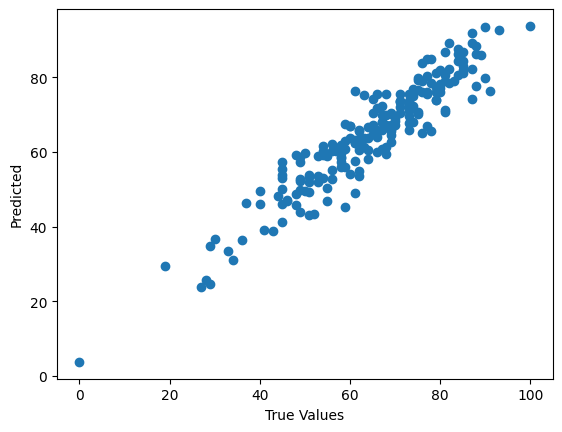

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted')

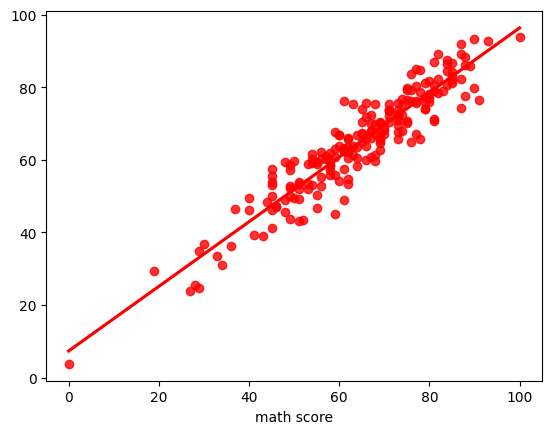

In [24]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

### Difference between actual and predicted values

In [25]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})

In [26]:
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
